### Assignment 3.2 Tree Map, Area Charts and Stacked Area Charts
### Python
#### Date: 1/20/2023
#### Author: Anjani Bonda

In [2]:
# Import libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import squarify
import numpy as np
from datetime import datetime as dt

In [3]:
# Read world population data
dirData = 'ex3-3'
file_expenditures = 'expenditures.txt'
file_unemployement = 'unemployement-rate-1948-2010.csv'

dir_expenditures = dirData+'/'+file_expenditures
dir_unemployment = dirData+'/'+file_unemployement

raw_expenditures = pd.read_csv(dir_expenditures, sep = '\t', header=0)
raw_unemployment = pd.read_csv(dir_unemployment) 

# Calculate total expenditure for categories
expenditures_cat = raw_expenditures.groupby(['category'])['expenditure'].sum().reset_index()

# Calculate total expenditure by year
expenditures_year = raw_expenditures.groupby(['year'])['expenditure'].sum().reset_index()

print(raw_expenditures.head())
print(expenditures_cat.head())
print(expenditures_year.head())
print(raw_unemployment.head())

   year             category  expenditure  sex
0  2008                 Food         6443    1
1  2008  Alcoholic Beverages          444    1
2  2008              Housing        17109    1
3  2008              Apparel         1801    1
4  2008       Transportation         8604    1
              category  expenditure
0  Alcoholic Beverages         8424
1              Apparel        41833
2   Cash Contributions        27987
3            Education        14498
4        Entertainment        44273
   year  expenditure
0  1984        21972
1  1985        23489
2  1986        23865
3  1987        24415
4  1988        25893
     Series id  Year Period  Value
0  LNS14000000  1948    M01    3.4
1  LNS14000000  1948    M02    3.8
2  LNS14000000  1948    M03    4.0
3  LNS14000000  1948    M04    3.9
4  LNS14000000  1948    M05    3.5


### Treemap
#### Expenditure data
For this treemap, I would like to see how much each category accounted in total.

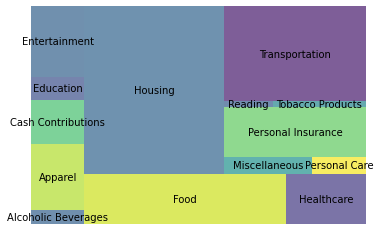

In [4]:
# Create tree map
squarify.plot(sizes=expenditures_cat['expenditure'], label=expenditures_cat['category'], alpha=.7 ) 
plt.axis('off') 
plt.show() 

### Area Chart
#### Expenditure data
For this area chart, I would like to see how much was the total expenditure every year

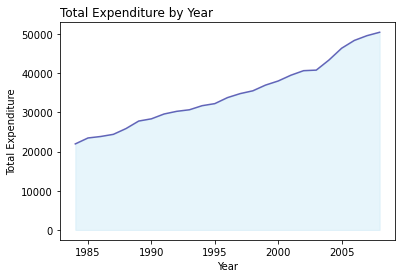

In [5]:
# Create x and y values to plot
x = expenditures_year['year']
y = expenditures_year['expenditure']
 
# Add a stronger line on top (edge)
plt.fill_between( x, y, color='skyblue', alpha=0.2)
plt.title('Total Expenditure by Year', loc='left')
plt.xlabel('Year')
plt.ylabel('Total Expenditure')
plt.plot(x, y, color='darkblue', alpha=0.6)

### Stacked Area Chart
#### Expenditure data
For stacked area chart, I would like to see how much was the total expenditure every year for each category

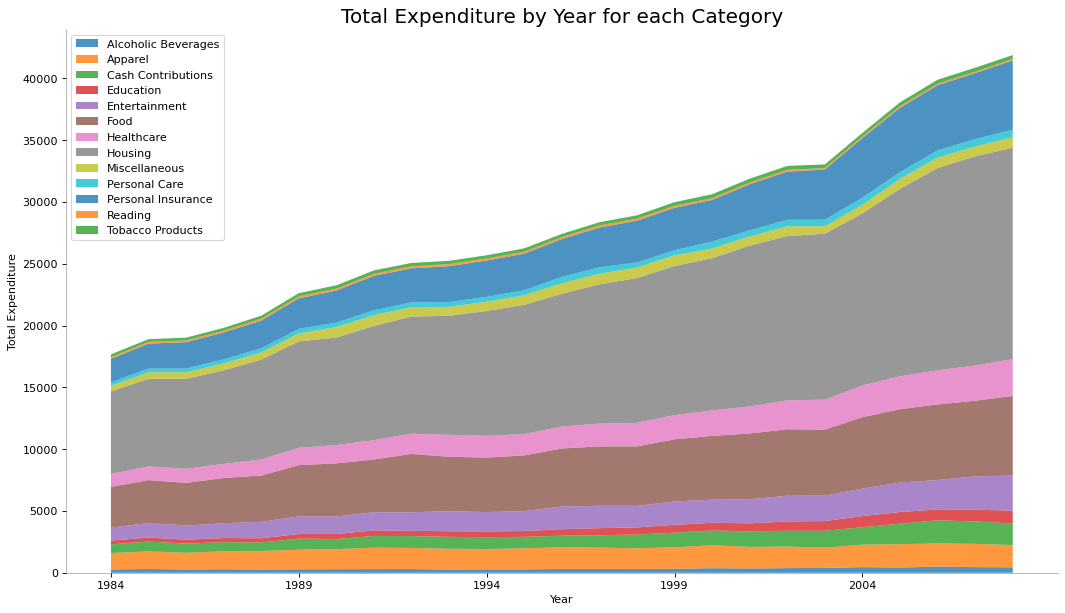

In [6]:
# Reshape data to be used for stacked area chart
plt_expenditures = raw_expenditures.loc[:, raw_expenditures.columns != 'sex'].pivot(index='year', columns='category', values='expenditure')
plt_expenditures.reset_index(level=0, inplace=True)

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = plt_expenditures.columns[1:]
labs = plt_expenditures.values.tolist()

# Prepare data
x  = plt_expenditures['year'].values.tolist()
y0 = plt_expenditures[columns[0]].values.tolist()
y1 = plt_expenditures[columns[1]].values.tolist()
y2 = plt_expenditures[columns[2]].values.tolist()
y3 = plt_expenditures[columns[3]].values.tolist()
y4 = plt_expenditures[columns[4]].values.tolist()
y5 = plt_expenditures[columns[5]].values.tolist()
y6 = plt_expenditures[columns[6]].values.tolist()
y7 = plt_expenditures[columns[7]].values.tolist()
y8 = plt_expenditures[columns[8]].values.tolist()
y9 = plt_expenditures[columns[9]].values.tolist()
y10 = plt_expenditures[columns[10]].values.tolist()
y11 = plt_expenditures[columns[11]].values.tolist()
y12 = plt_expenditures[columns[12]].values.tolist()
y = np.vstack([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, alpha=0.8)

# Create title
ax.set_title('Total Expenditure by Year for each Category', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Total Expenditure')

# Show legend
ax.legend(fontsize=10, ncol=1, loc = 'upper left')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

# Output graph
plt.show()
